In [59]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Load the dataset
uber_data = pd.read_csv('UberDataset.csv')
uber_data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
uber_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
uber_data.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


array([[<Axes: title={'center': 'MILES'}>]], dtype=object)

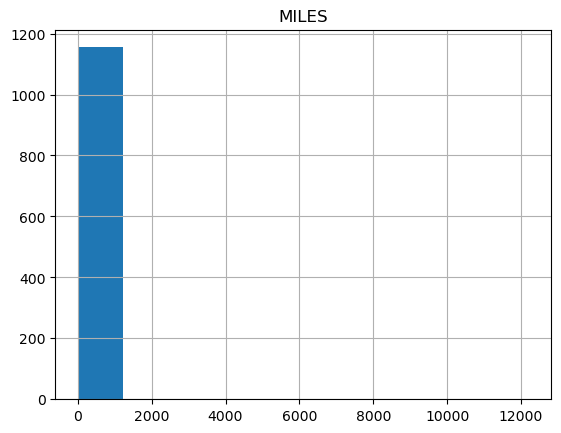

In [6]:
uber_data.hist()

In [22]:
# Check for NaN values in the DataFrame
nan_values = uber_data.isnull().sum()

# Print the columns with NaN values and their counts
print("Columns with NaN values:")
print(nan_values[nan_values > 0])

Columns with NaN values:
START_DATE     422
END_DATE         1
CATEGORY         1
START            1
STOP             1
PURPOSE        503
hour           422
day_of_week    422
dtype: int64


In [51]:
# Handle missing values
uber_data.fillna(0, inplace=True)

In [30]:
# Handle missing values for datetime columns
uber_data['START_DATE'].fillna(pd.to_datetime(0), inplace=True)
uber_data.fillna(0, inplace=True)

C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


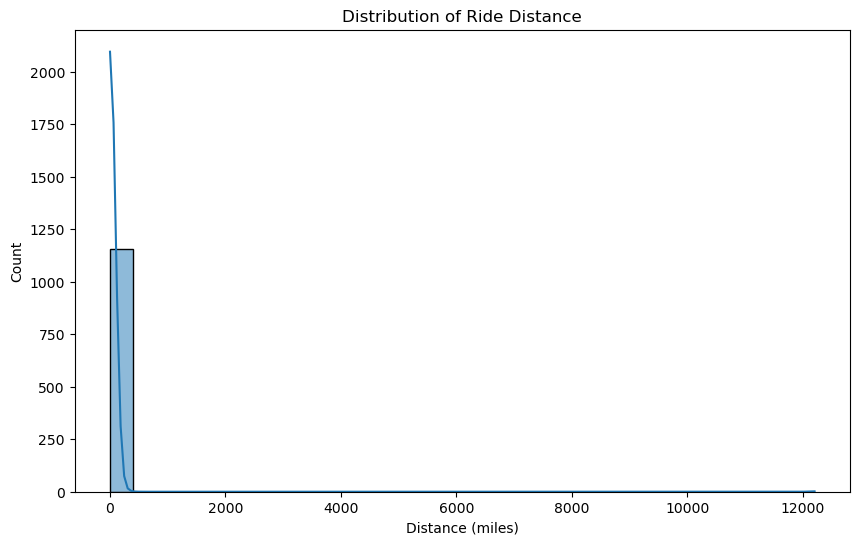

In [52]:
# Exploratory Data Analysis (EDA)
# Plot distribution of ride duration
plt.figure(figsize=(10, 6))
sns.histplot(uber_data['MILES'], bins=30, kde=True)
plt.title('Distribution of Ride Distance')
plt.xlabel('Distance (miles)')
plt.show()

In [32]:
# Temporal Analysis
# Extract hour and day of the week from START_DATE
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format="%m/%d/%Y %H:%M", errors='coerce', infer_datetime_format=True)
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format="%m-%d-%Y %H:%M", errors='coerce', infer_datetime_format=True)

# Extract hour and day of the week
uber_data['hour'] = uber_data['START_DATE'].dt.hour
uber_data['day_of_week'] = uber_data['START_DATE'].dt.day_name()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16648\2769661532.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format="%m/%d/%Y %H:%M", errors='coerce', infer_datetime_format=True)
C:\Users\KIIT\AppData\Local\Temp\ipykernel_16648\2769661532.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'], format="%m-%d-%Y %H:%M", errors='coerce', infer_datetime_format=True)


C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


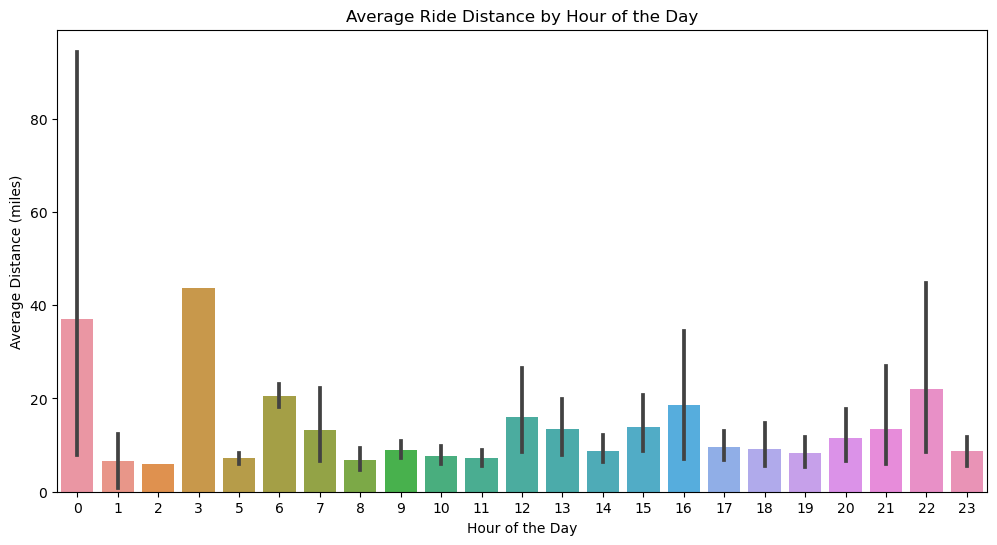

In [33]:
# Plot average ride distance by hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='MILES', data=uber_data, estimator='mean')
plt.title('Average Ride Distance by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Distance (miles)')
plt.show()

In [53]:
# Convert the 'PURPOSE' column to strings
uber_data['PURPOSE'] = uber_data['PURPOSE'].astype(str)

In [54]:
# Temporal Analysis
# Extract hour and day of the week from START_DATE
uber_data['START_DATE'] = pd.to_datetime(uber_data['START_DATE'])
uber_data['hour'] = uber_data['START_DATE'].dt.hour
uber_data['day_of_week'] = uber_data['START_DATE'].dt.day_name()

In [55]:
# Features and target variable
features = uber_data[['MILES', 'hour']]
target = uber_data['PURPOSE']

In [56]:
# Convert target variable to numerical format
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

In [60]:
# Train a logistic regression model (classification)
model = LogisticRegression(max_iter=1000)  # You can adjust max_iter based on your data
model.fit(X_train, y_train)

C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [61]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [62]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

In [63]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.43103448275862066
Confusion Matrix:
[[100   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0]
 [ 16   0   0   0   0   0   0   0   0]
 [ 24   0   0   0   0   0   0   0   0]
 [ 39   0   0   0   0   0   0   0   0]
 [ 42   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0]]


In [79]:
# Preprocess data
preprocessed_data = preprocess_data(uber_data)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16648\1812099383.py:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['START_DATE'] = pd.to_datetime(data['START_DATE'], infer_datetime_format=True, errors='coerce')


In [80]:
print(preprocessed_data.describe())

                          START_DATE         MILES         hour
count                           1156   1156.000000  1156.000000
mean   1999-07-27 02:36:57.404844288     21.115398     9.224913
min              1970-01-01 00:00:00      0.500000     0.000000
25%              1970-01-01 00:00:00      2.900000     0.000000
50%              2016-03-22 01:17:30      6.000000    11.000000
75%              2016-08-27 14:34:30     10.400000    16.000000
max              2016-12-31 22:08:00  12204.700000    23.000000
std                              NaN    359.299007     7.868152


In [81]:
print(preprocessed_data.head())

  START_DATE          END_DATE  CATEGORY        START             STOP  MILES  \
0 1970-01-01  01-01-2016 21:17  Business  Fort Pierce      Fort Pierce    5.1   
1 1970-01-01  01-02-2016 01:37  Business  Fort Pierce      Fort Pierce    5.0   
2 1970-01-01  01-02-2016 20:38  Business  Fort Pierce      Fort Pierce    4.8   
3 1970-01-01  01-05-2016 17:45  Business  Fort Pierce      Fort Pierce    4.7   
4 1970-01-01  01-06-2016 15:49  Business  Fort Pierce  West Palm Beach   63.7   

           PURPOSE  hour day_of_week  
0   Meal/Entertain     0    Thursday  
1                0     0    Thursday  
2  Errand/Supplies     0    Thursday  
3          Meeting     0    Thursday  
4   Customer Visit     0    Thursday  


C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


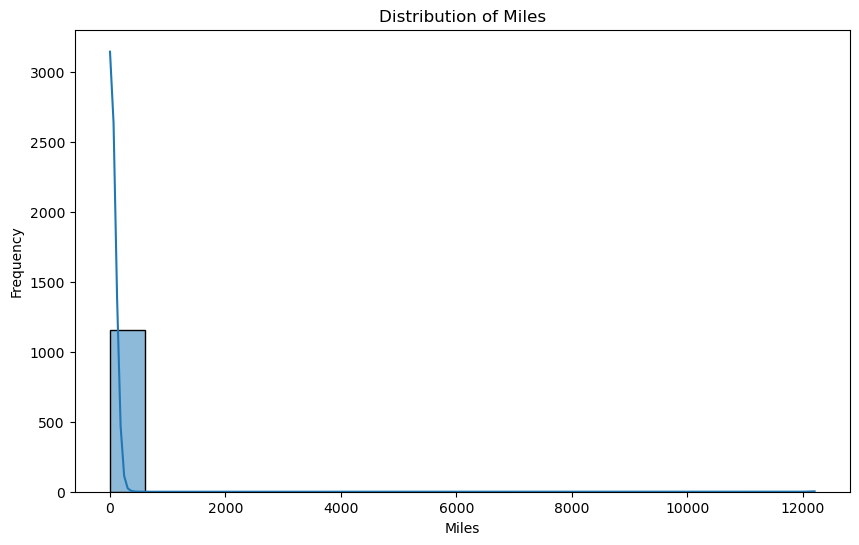

In [82]:
#Plotting a histogram of the 'MILES' column
plt.figure(figsize=(10, 6))
sns.histplot(preprocessed_data['MILES'], bins=20, kde=True)
plt.title('Distribution of Miles')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

In [83]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.43103448275862066
Confusion Matrix:
[[100   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0]
 [ 16   0   0   0   0   0   0   0   0]
 [ 24   0   0   0   0   0   0   0   0]
 [ 39   0   0   0   0   0   0   0   0]
 [ 42   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0]
 [  5   0   0   0   0   0   0   0   0]]
